# Convolutional Neural Network
#### [Conv Visualization](https://github.com/vdumoulin/conv_arithmetic)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Activation, Flatten
from keras.utils import np_utils

In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
dataset = read_csv('../datasets/fashion-mnist-test.csv').values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:, 1:], dataset[:, 0], test_size=0.2)
X_train, X_test = X_train/255, X_test/255
X_train, X_test = X_train.reshape((-1,28,28,1)), X_test.reshape((-1,28,28,1))
y_train, y_test = np_utils.to_categorical(y_train), np_utils.to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 28, 28, 1) (2000, 28, 28, 1) (8000, 10) (2000, 10)


In [18]:
X_train.shape

(8000, 28, 28, 1)

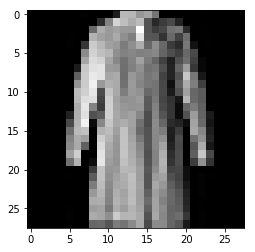

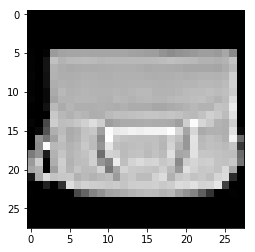

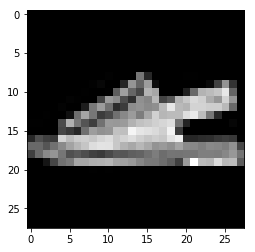

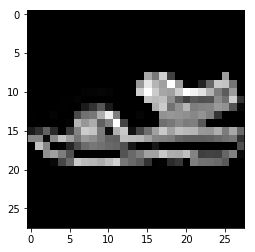

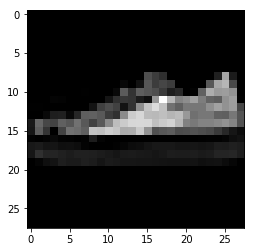

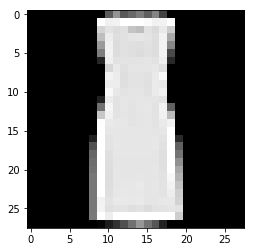

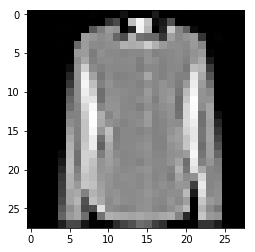

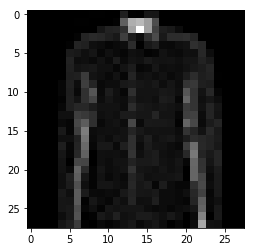

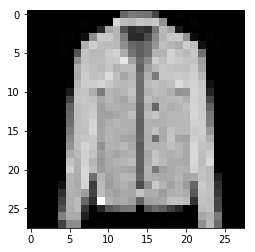

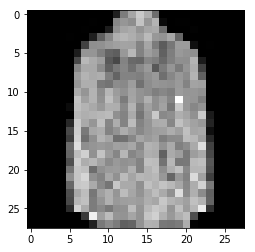

In [14]:
for i in range(10):
    plt.figure()
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.show()

In [27]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))


model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
activation_12 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 32)          12832     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              525312    
__________

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
hist = model.fit(X_train, y_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 7s 836us/step - loss: 1.9449 - acc: 0.3524 - val_loss: 1.0483 - val_acc: 0.6730
Epoch 2/30
8000/8000 [==============================] - 6s 703us/step - loss: 0.8432 - acc: 0.7004 - val_loss: 0.7318 - val_acc: 0.7235
Epoch 3/30
8000/8000 [==============================] - 6s 761us/step - loss: 0.6784 - acc: 0.7392 - val_loss: 0.6734 - val_acc: 0.7465
Epoch 4/30
8000/8000 [==============================] - 7s 896us/step - loss: 0.6136 - acc: 0.7631 - val_loss: 0.6006 - val_acc: 0.7730
Epoch 5/30
8000/8000 [==============================] - 6s 726us/step - loss: 0.5889 - acc: 0.7739 - val_loss: 0.5707 - val_acc: 0.7820
Epoch 6/30
8000/8000 [==============================] - 7s 841us/step - loss: 0.5316 - acc: 0.7993 - val_loss: 0.5312 - val_acc: 0.8025
Epoch 7/30
8000/8000 [==============================] - 7s 827us/step - loss: 0.4998 - acc: 0.8135 - val_loss: 0.5155 - val_acc: 0.8140


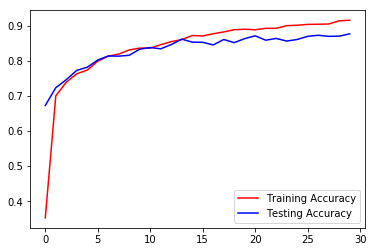

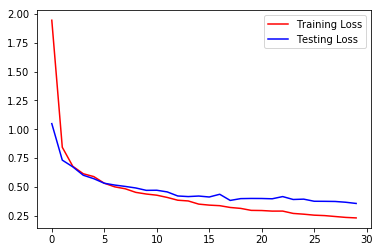

In [30]:
plt.figure()
plt.plot(hist.history['acc'], 'r', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'b', label='Testing Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(hist.history['loss'], 'r', label='Training Loss')
plt.plot(hist.history['val_loss'], 'b', label='Testing Loss')
plt.legend()
plt.show()